(DGTGRAFO)=

# 4.1 Definiciones generales de flujo en redes y teoría de grafos

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de 

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* Tendrá una lista de definiciones de flujo en redes y teoría de grafos.


```

```{sidebar} Un poco de historia ...

El área de [investigación de operaciones](https://en.wikipedia.org/wiki/Operations_research) tuvo un gran desarrollo entre los años 40's y 50's principalmente para resolver la asignación de recursos disponibles en actividades militares (de hecho el nombre hace referencia a operaciones militares). Métodos como el [símplex](https://en.wikipedia.org/wiki/Simplex_algorithm) de Dantzig fueron desarrollados en esta época y establecieron triunfos importantes del lado de Estados Unidos y Gran Bretaña en batallas militares. Posterior a la segunda guerra mundial la complejidad de la división del trabajo y organización en empresas plantearon problemas en esencia iguales que los que se debían resolver en las guerras.
Esta área resuelve problemáticas como son las relacionadas con la conducción y coordinación de actividades en una organización. La investigación de operaciones ha sido aplicada de manera extensa en manufactura, transporte, construcción, telecomunicaciones, planeación financiera, cuidado de la salud, fuerzas armadas y servicios públicos, entre otros.
```

Muchas aplicaciones en el área de investigación de operaciones ayudan a modelar y resolver situaciones en forma de una red de nodos conectados como las siguientes:

1. Diseño de una tubería en una zona para conectar las locaciones de suministro de cierto producto con puntos de descarga del mismo con el objetivo de minimizar el costo de construír tal tubería. 
   Diseño de un cableado de telefonía subterránea para establecer la comunicación entre cualquier par de domicilios de personas con el objetivo de minimizar la cantidad de kilómetros que se usarán de cable.

2. Determinar la ruta más corta entre dos ciudades en una red de transporte que involucra más de dos ciudades.

3. Determinar la capacidad máxima de cierta sustancia que puede soportar una tubería que conecta dos o más plantas de suministro. 
   Determinar la asignación de personas en tranvías para llegar a destinos mediante varias rutas en un parque de diversiones de modo que se maximice el número total de viajes que se pueden hacer al día por diferentes rutas, las cuales tienen cierto límite de viajes en cada ruta.

4. Determinar la agenda y planeación de actividades incluyendo fechas de inicio y término de un proyecto.

5. Determinar la distribución de flujo con costo mínimo de campos de petróleo hacia refinerías a través de una red de tuberías.

## Problemas/Modelos de flujo en redes, *aka network flow problems/models*, estándar

Un buen número de problemas de optimización de redes son en realidad tipos especiales de problemas de programación lineal, por ejemplo el {ref}`problema de transporte <EJPROBTRANSPORTE>` en el que se resuelve cómo determinar la manera óptima de transportar bienes. Otro problema es el definido en un **problema de asignación** que incluye aplicaciones como la asignación de personas a tareas. Aunque los métodos clásicos del símplex o puntos interiores (ver {ref}`introducción a los métodos de puntos interiores <INTMETPIN>`) podrían utilizarse para resolver tales problemas, existen métodos especializados (como [network simplex](https://en.wikipedia.org/wiki/Network_simplex_algorithm) o dual simplex) aplicados a grafos o redes que modelan tales problemas y tienen un mejor desempeño que los clásicos.

Es típico encontrar en la literatura el estudio de tres preguntas básicas relacionadas con problemas específicos:

1. **Problema del camino o ruta más corta**. ¿Cuál es la mejor manera para recorrer una red y llegar de un punto a otro de modo que sea lo más barato posible?

2. **Problema de flujo máximo**. Si una red tiene capacidades en sus arcos ¿cómo podemos enviar la mayor cantidad de flujo posible entre dos puntos en la red manteniendo los límites de capacidades en sus arcos?

3. **Problema del flujo con costo mínimo**. Si se incurre en un costo por unidad de flujo en una red con capacidades en sus arcos y necesitamos enviar unidades de un bien que residen en uno o más puntos en la red hacia uno o más puntos distintos en la misma ¿cómo podemos enviar tal material al mínimo costo posible?

A los problemas anteriores los nombraremos como **problemas/modelos de flujo en redes o *network flow problems/models* estándar**.

```{admonition} Comentarios

* La solución de los problemas estándar puede realizarse enumerando las posibles alternativas para cada problema, esto si bien resuelve las preguntas planteadas, no es práctico por la cantidad enorme de alternativas que resultarían. Por esto se requieren algoritmos cuyo tiempo de cómputo sea pequeño o al menos razonable. 

* Los problemas estándar han sido estudiados y descritos ampliamente en la literatura principalmente por ser modelos abstractos que han permitido el desarrollo de algoritmos para resolver problemas en aplicaciones que surgen en la práctica más compejos y que comparten similitudes con los estándar.

```

## Definiciones generales para grafos o flujo en redes

La representación con grafos o redes las encontramos en muchas áreas como producción, distribución, planeación de proyectos, localización de instalaciones, administración de recursos y planeación financiera. Además, provee una visualización conceptual poderosa para mostrar las relaciones entre las componentes de sistemas científicos, sociales y económicos por mencionar algunos.

A continuación se presentan definiciones utilizadas en la literatura sobre flujo en redes y teoría de grafos.

```{admonition} Observación
:class: tip

El nombre de grafo o red se utiliza como sinónimos.

```

### Grafos o redes dirigidas

```{admonition} Definición

Un grafo o red dirigida $\mathcal{G} = (N, A)$ consiste de un conjunto $N$ de nodos (vértices, puntos) y un conjunto $A$ de arcos (aristas, ramas, líneas) cuyos elementos son pares ordenados para nodos distintos.

```

**Ejemplo**

El siguiente grafo dirigido tiene como nodos $N = \{1, 2, 3, 4, 5, 6, 7\}$ y arcos $A = \{(1,2), (1,3), (2,3), (2,4), (3,6), (4,5), (4,7), (5,2), (5,3), (5,7), (6,7) \}$.

```{margin}

Para generar este grafo utilicé [networkx](https://networkx.github.io/).

```

In [ ]:
!pip install --user --quiet networkx

<img src="https://dl.dropboxusercontent.com/s/1aqzg6odghxmxx4/graph_example_1.png?dl=0" heigth="400" width="400">


In [1]:
import matplotlib.pyplot as plt
import networkx as nx

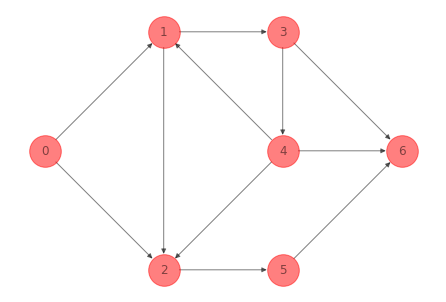

In [4]:
nodes_pos = [[0.09090909090909091, 0.4545454545454546],
             [0.36363636363636365, 0.18181818181818182],
             [0.36363636363636365, 0.7272727272727273],
             [0.6363636363636364,  0.7272727272727273],
             [0.9090909090909092,  0.4545454545454546],
             [0.6363636363636364,  0.18181818181818182],
             [0.6363636363636364,  0.4545454545454546]]
nodes = range(len(nodes_pos))
G = nx.DiGraph() 
G.add_nodes_from(nodes)
mapping = {0: 0,
           1: 2,
           2: 1,
           3: 3,
           4: 6,
           5: 5,
           6: 4} 
G_ex_1 = nx.relabel_nodes(G, mapping)
pos = {}
for idx in mapping.keys():
    pos[mapping[idx]] = nodes_pos[idx]
G_ex_1.add_edge(0,1)
G_ex_1.add_edge(0,2)
G_ex_1.add_edge(1,2)
G_ex_1.add_edge(1,3)
G_ex_1.add_edge(2,5)
G_ex_1.add_edge(3,4)
G_ex_1.add_edge(3,6)
G_ex_1.add_edge(4,1)
G_ex_1.add_edge(4,2)
G_ex_1.add_edge(4,6)
G_ex_1.add_edge(5,6)
nx.draw(G_ex_1, pos = pos,
        with_labels = True,
        node_color='r', node_size=1000,alpha=0.5)
plt.show()

### Grafos o redes no dirigidas

```{admonition} Definición

Se define un grafo o red no dirigida al igual que el caso dirigido considerando que los arcos son pares no ordenados de nodos distintos. En un grafo no dirigido podemos referirnos al arco que une al par de nodos $i$ y $j$ como $(i,j)$ o $(j,i)$ indistintamente. 

```

```{admonition} Observación
:class: tip

La interpretación de un arco $(i,j)$ no dirigido se interpreta indicando que el flujo se permite en ambas direcciones, de $i$ a $j$ o $j$ a $i$. En el dirigido sólo una dirección es permitida.

```

**Ejemplo**

El siguiente grafo no dirigido tiene como nodos $N = \{1, 2, 3, 4, 5, 6\}$ y  arcos $A = \{(2,1), (1,3), (4,2), (2,5), (4,3), (3,5), (5,6), (6,4) \}$:

<img src="https://dl.dropboxusercontent.com/s/3e0vgko0yk6m8ck/graph_example_2.png?dl=0" heigth="450" width="450">

El grafo anterior tiene arcos con valores numéricos asociados que ayudan a representar típicamente costos, capacidades y/o suministro o demanda. 

```{admonition} Definición

En la terminología de flujo en redes la capacidad de un arco es la cantidad máxima de flujo que puede circular en el mismo.

```

```{admonition} Comentarios

* Los arcos en un grafo no dirigido en ocasiones se les nombra ligaduras.

* Un grafo no dirigido puede convertirse en un grafo dirigido sustituyendo las ligaduras por dos arcos en direcciones opuestas entre el par de nodos involucrados. La interpretación en este caso puede ser un "flujo neto" entre ambos nodos. Por lo anterior las definiciones también son aplicables a grafos no dirigidos por lo que las definiciones asumen que se tiene un grafo dirigido.

```

### Adyacencia

```{admonition} Definición

Si existe un arco $(i,j) \in A$ entonces el nodo $j$ es adyacente al nodo $i$.

```

**Referencias:**

1. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.

2. R. K. Ahuja, T. L. Magnanti, J. B. Orlin, Network Flows, Theory, Algorithms and Applications, Prentice Hall, 1993.

1. M. S. Bazaraa, J. J. Jarvis, H. D. Sherali, Linear Programming and Network Flows, Wiley, 2010.



